In [1]:
#Libraries:
import numpy as np
from numpy.linalg import inv
from numpy.linalg import norm
from numpy.linalg import eigvals
import pandas as pd
import scipy.sparse as sp
import matplotlib.pyplot as plt

In [2]:
#Solvers:
def backU(U,b,N):
    '''Takes in triangular matrix U, vector b and dimention of matrix n
    computes x from matrix equation Ax=b troughout nested backsubstitution'''

    x_computed = np.zeros(N)
    for i in range(N - 1, -1, -1):                  # itererer over matrisen vertikalt
        x_tmp = b[i]                                # henter ut siste kjente x

        for j in range(N - 1, i, -1):               # iterer over kollonene for neste x gitt x_temp = kollonens b
            x_tmp =x_tmp - x_computed[j] * U[i, j]  # beregner neste x

        x_computed[i] = x_tmp / U[i, i]
    return x_computed





def jacobi(A, x, b, n, tol=0.5e-15):
    '''Takes in matrix A, initial guess vector x and result vector b from equation Ax=b, and 
    number of max iterations n diagonalise matrix and conducts Jacobi method. 
    Returnes pandas dataframe with approximated x (X_c), norm of x (x_norm) and error_norm (e_norm)'''
    
    D =  np.diag(np.diag(A))
    U = np.triu(A)-D
    L = np.tril(A)-D
    LU = L+U
    
    x_iter = []    
    e_norm = []
    x_norm = []
    e = np.inf
    for i in range(n):
        if e <= tol:
            break
        x = np.dot(inv(D), (b - np.dot(LU,x)))
        x_iter.append(x)
        e = norm(abs(np.dot(A,x)-b), np.inf)
        e_norm.append(e)
        x_norm.append(norm(x, np.inf))
        
    df = pd.DataFrame({'X_c': x_iter, 'e_norm': e_norm, 'x_norm': x_norm})
    return df



def gaus_seidel_backsub(A, x, b, n, tol=0.5e-15):
    '''Takes in matrix A, initial guess vector x and result vector b from equation Ax=b, and 
    number of max iterations n diagonalise matrix and conducts Gaus-Seidell itteration method. 
    Returnes pandas dataframe with approximated x (X_c), norm of x (x_norm) and error_norm (e_norm)'''
    
    D =  np.diag(np.diag(A))
    U = np.triu(A)
    L = np.tril(A)-D
    x_iter = []
    x_norm = []
    e_norm = []
    e=np.inf
    
    for i in range(n):
        if e <= tol:
            break
        x_new = backU(U= U, b= (b-np.dot(L,x)), N= A.shape[0])
        x_iter.append(x_new)
        x = x_new
        e = norm(abs(np.dot(A,x_new)-b), np.inf)        
        e_norm.append(e)
        x_norm.append(norm(x_new, np.inf))

        
    df = pd.DataFrame({'X_c': x_iter, 'e_norm': e_norm, 'x_norm': x_norm})
    return df


In [3]:
#Convergence test and input data:
A=np.array([[9,9,1],[2,7,2],[2,2,5]])
b=np.array([30,22,21])
x0 = np.array([1.1,2.1,3.1])
        
def convergence_test(A):
    '''calculate the spectral radius from matrix A, print 
    result and return statement about convergence'''
    D = np.diag(np.diag(A))
    R = A-D
    T = np.dot(-inv(D),R)
    spectral_radius = max(abs(eigvals(T)))
    string = ''
    
    if spectral_radius < 1:
        string += f'spectral radius = {spectral_radius} < 1  hence => Convergence'
    else:
        string += f'spectral radius = {spectral_radius} >= 1 hence => Divergeence'
    print(string)

convergence_test(A)

NameError: name 'np' is not defined

In [4]:
#Jacobi n=100 (steps):
J_n100 = jacobi(A=A,x=x0,b=b,n=100)
J_n100

,X_c,e_norm,x_norm
0,"[0.8888888888888884, 1.9428571428571426, 2.92]",1.594286e+00,2.920000
1,"[1.0660317460317463, 2.0546031746031748, 3.067...",1.153016e+00,3.067302
2,"[0.9379188712522044, 1.9619047619047614, 2.951...",9.498413e-01,2.951746
3,"[1.0434567901234573, 2.0315243134290752, 3.040...",7.149005e-01,3.040071
4,"[0.9640234036001232, 1.9761350466112368, 2.970...",5.685664e-01,2.970008
...,...,...,...
95,"[1.000000000004951, 2.0000000000033826, 3.0000...",7.927881e-11,3.000000
96,"[0.9999999999961421, 1.9999999999973632, 2.999...",6.178524e-11,3.000000
97,"[1.0000000000030072, 2.0000000000020544, 3.000...",4.814993e-11,3.000000
98,"[0.9999999999976571, 1.9999999999983984, 2.999...",3.752376e-11,3.000000


In [5]:
#Jacobi method with 10 digits accuracy:

J = jacobi(A=A,x=x0,b=b,n=200, tol=0.5e-10)
J

,X_c,e_norm,x_norm
0,"[0.8888888888888884, 1.9428571428571426, 2.92]",1.594286e+00,2.920000
1,"[1.0660317460317463, 2.0546031746031748, 3.067...",1.153016e+00,3.067302
2,"[0.9379188712522044, 1.9619047619047614, 2.951...",9.498413e-01,2.951746
3,"[1.0434567901234573, 2.0315243134290752, 3.040...",7.149005e-01,3.040071
4,"[0.9640234036001232, 1.9761350466112368, 2.970...",5.685664e-01,2.970008
...,...,...,...
93,"[1.0000000000081506, 2.0000000000055693, 3.000...",1.305231e-10,3.000000
94,"[0.9999999999936481, 1.999999999995659, 2.9999...",1.017249e-10,3.000000
95,"[1.000000000004951, 2.0000000000033826, 3.0000...",7.927881e-11,3.000000
96,"[0.9999999999961421, 1.9999999999973632, 2.999...",6.178524e-11,3.000000


<AxesSubplot:title={'center':'log plot of Error norm of Jacobi'}>

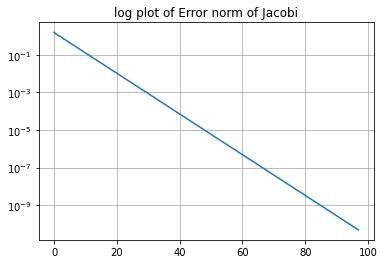

In [6]:
J['e_norm'].plot(title='log plot of Error norm of Jacobi tol=0.5e-10', grid=True, logy=True)

<AxesSubplot:title={'center':'log plot of X norm of Jacobi n=100'}>

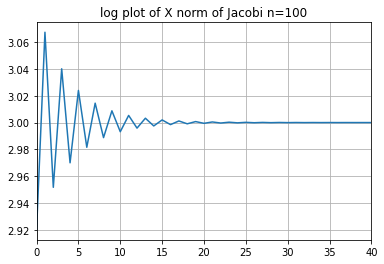

In [15]:
J['x_norm'].plot(title='log plot of X norm of Jacobi n=100', grid=True, xlim=(0,40))

In [8]:
#Gauss Seidel with 10 digits accuracy:
G=gaus_seidel_backsub(A=A,x=x0,b=b,n=200, tol=0.5e-10)
G

,X_c,e_norm,x_norm
0,"[1.0146031746031743, 1.9942857142857144, 2.92]",3.822222e-01,2.920000
1,"[1.0035515243134288, 1.9968435374149662, 2.996...",2.210330e-02,2.996444
2,"[1.0009871296196313, 1.9990304286794085, 2.999...",5.128789e-03,2.999842
3,"[1.000280810740279, 1.999719969628567, 2.99999...",1.412638e-03,2.999993
4,"[1.0000801771381285, 1.9999198575449313, 2.999...",4.012672e-04,3.000000
5,"[1.0000229053314418, 1.9999770962100274, 2.999...",1.145436e-04,3.000000
6,"[1.0000065442727535, 1.9999934557957562, 2.999...",3.272212e-05,3.000000
7,"[1.0000018697874309, 1.9999981302156142, 2.999...",9.348971e-06,3.000000
8,"[1.0000005342247675, 1.9999994657753677, 2.999...",2.671125e-06,3.000000
9,"[1.0000001526356384, 1.9999998473643676, 2.999...",7.631783e-07,3.000000


<AxesSubplot:title={'center':'log plot of Error norm of GS  tol=0.5e-10'}>

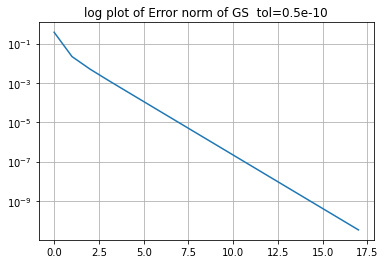

In [12]:
G['e_norm'].plot(title='log plot of Error norm of GS  tol=0.5e-10', grid=True, logy=True)

<AxesSubplot:title={'center':'log plot of X norm of GS  tol=0.5e-10'}>

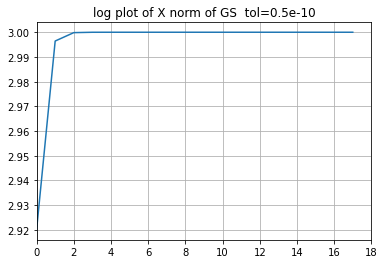

In [11]:
G['x_norm'].plot(title='log plot of X norm of GS  tol=0.5e-10', grid=True, xlim=(0,18))